In [4]:
from mpl_toolkits.axes_grid.axislines import SubplotZero
import matplotlib.pyplot as plt
import pylab
import numpy as np
import math
from math import sqrt
import sympy as sp
import time

In [5]:
def axes():
    fig = plt.figure(1)
    ax = SubplotZero(fig, 111)
    fig.add_subplot(ax)

    for direction in ["xzero", "yzero"]:
        ax.axis[direction].set_axisline_style("-|>")
        ax.axis[direction].set_visible(True)

    for direction in ["left", "right", "bottom", "top"]:
        ax.axis[direction].set_visible(False)

##### №2

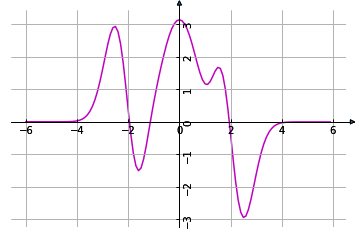

In [7]:
axes()

func_glob = lambda x: ((np.power(x, 9) + np.pi) * (np.cos(np.log(np.power(x, 2) + 1)))/(np.exp(x ** 2))) - (x / 2019)
X = np.arange(-6.0, 6.0, 0.1)
plt.plot([x for x in X], [func_glob(x) for x in X], "-m")
plt.grid(True)
plt.show()

Отрезки отделённости корней: [-2.5, -1.7]; [-1,5; 0]; [1.5, 2.5];  

##### №3 Метод бисекции

In [8]:
eps = 0.0001

def bisection_desc(a, b, f):
    cnt = 0
    while (math.fabs(b - a) > 2 * eps):
        x = (a + b) / 2
        a, b = (a, x) if f(a) * f(x) < 0 else (x, b)
        cnt += 1
    return a, b, cnt

def bisection_asc(a, b, f):
    cnt = 0
    while (math.fabs(b - a) > 2 * eps):
        x = (a + b) / 2
        a, b = (x, a) if f(a) * f(x) < 0 else (b, x)
        cnt += 1
    return a, b, cnt

Отрезки отделённости корней после метода бисекции:

In [9]:
a1, b1, cnt1 = bisection_desc(-2.5, -1.7, func_glob)
a2, b2, cnt2 = bisection_asc(-1.5, 0, func_glob) 
a3, b3, cnt3 = bisection_desc(1.5, 2.5, func_glob) 

print("[" + str(a1) + "; " + str(b1) + "]; steps = " + str(cnt1))
print("[" + str(a2) + "; " + str(b2) + "]; steps = " + str(cnt2))
print("[" + str(a3) + "; " + str(b3) + "]; steps = " + str(cnt3))

[-1.9519531250000002; -1.9517578125000001]; steps = 12
[-1.1356201171875; -1.13580322265625]; steps = 13
[1.951904296875; 1.9520263671875]; steps = 13


##### №4 Дискретный вариант метода Ньютона

In [10]:
eps = 0.00000000000001  

def newton_discr(a, b, f, delta):
    x0 = (a + b) / 2
    x1 = x0 - (f(x0) * delta / (f(x0 + delta) - f(x0)))
    cnt = 1
    while True:
        if math.fabs(x1 - x0) < eps: return x1, cnt
        x0 = x1
        x1 = x0 - (f(x0) * delta / (f(x0 + delta) - f(x0)))
        cnt += 1

In [11]:
delta = 0.001
x1_dn, cnt1 = newton_discr(a1, b1, func_glob, delta)
x2_dn, cnt2 = newton_discr(a2, b2, func_glob, delta)
x3_dn, cnt3 = newton_discr(a3, b3, func_glob, delta)
print("x = " + str(x1_dn) + "; steps = " + str(cnt1))
print("x = " + str(x2_dn) + "; steps = " + str(cnt2))
print("x = " + str(x3_dn) + "; steps = " + str(cnt3))

x = -1.9519126405979392; steps = 5
x = -1.1357566443218374; steps = 4
x = 1.9519146383835093; steps = 4


#####  №5 Метод Ньютона

In [12]:
eps = 0.000000000000001   

def newton(a, b, f, f1, x_discr):
    x0 = x_discr
    x1 = x0 - (f(x0) / f1(x0))
    cnt = 1
    while True:
        if math.fabs(x1 - x0) < eps: return x1, cnt
        x0 = x1
        x1 = x0 - (f(x0) / f1(x0))
        cnt += 1

In [13]:
derivative_first = lambda x: x * np.exp(-(x ** 2)) * (np.cos(np.log(np.power(x, 2) + 1)) * (9 * np.power(x, 7) - 2 * (np.power(x, 9) + np.pi)) - 2 * (np.power(x, 9) + np.pi) * np.sin(np.log(np.power(x, 2) + 1)) * (1 / (x ** 2 + 1))) - 1/2019

x1_n, cnt1 = newton(a1, b1, func_glob, derivative_first, x1_dn)
x2_n, cnt2 = newton(a2, b2, func_glob, derivative_first, x2_dn)
x3_n, cnt3 = newton(a3, b3, func_glob, derivative_first, x3_dn)
print("x = " + str(x1_n) + "; steps = " + str(cnt1))
print("x = " + str(x2_n) + "; steps = " + str(cnt2))
print("x = " + str(x3_n) + "; steps = " + str(cnt3))

x = -1.9519126405979392; steps = 1
x = -1.1357566443218374; steps = 1
x = 1.9519146383835095; steps = 1


##### №6 Интерполяционные многочлены функции 𝑓(𝑥) на отрезке [−4,4] по 6,12,18 равноотстоящим узлам

In [14]:
def generate_nodes(step_cnt):
    step_size = 8 / (step_cnt - 1)
    res_x = np.arange(-4, 4.01, step_size)
    res_y = [func_glob(x) for x in res_x]
    return res_x, res_y

In [15]:
def lagranz(x, y, t):
    sum = 0
    for j in range(len(y)):
        p1 = 1; p2 = 1
        for i in range(len(x)):
            if i != j:
                p1 = p1 * (t - x[i])
                p2 = p2 * (x[j] - x[i])
        sum = sum + y[j] * p1 / p2
    return sum

6 узлов:
[-4.  -2.4 -0.8  0.8  2.4  4. ]
Значения:
[0.030089631303446638, 2.77582002952591, 1.3960494629774842, 1.519831685246545, -2.782426975271666, -0.030090305027553745]


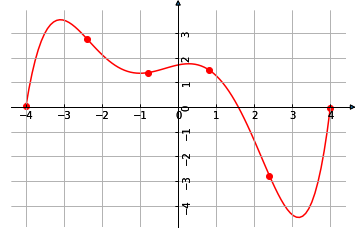

time:  0.00864622845616926

12 узлов:
[-4.         -3.27272727 -2.54545455 -1.81818182 -1.09090909 -0.36363636
  0.36363636  1.09090909  1.81818182  2.54545455  3.27272727  4.        ]
Значения:
[0.030089631303446638, 0.7478960403208041, 2.9404807006060723, -0.8670934896183915, 0.20590233216198175, 2.7313541307855562, 2.731187224811086, 1.1475756846920275, 0.8925788137376873, -2.9446000446638254, -0.7480049138104793, -0.030090305027553187]


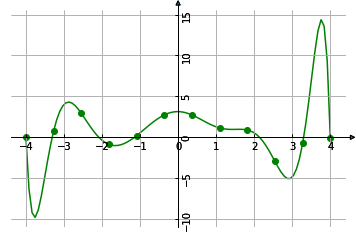

time:  0.028701068327821877

18 узлов:
[-4.         -3.52941176 -3.05882353 -2.58823529 -2.11764706 -1.64705882
 -1.17647059 -0.70588235 -0.23529412  0.23529412  0.70588235  1.17647059
  1.64705882  2.11764706  2.58823529  3.05882353  3.52941176  4.        ]
Значения:
[0.030089631303446638, 0.28501570781449687, 1.406778421356133, 2.909895836695101, 1.2597893082304918, -1.461712818159027, -0.1896635253586207, 1.7309195629461376, 2.9681908316939083, 2.9679619287421084, 1.7788293696210524, 1.2062226529726412, 1.5684887007478676, -1.2690582446702392, -2.913404114568826, -1.4071551303688303, -0.2850366524052681, -0.030090305027553468]
time:  0.06932312555551612


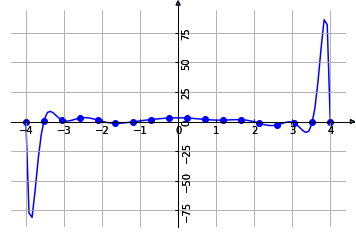

In [16]:
x1, y1 = generate_nodes(6)
print('6 узлов:')
print(x1)
print('Значения:')
print(y1)

axes()

xnew1 = np.linspace(np.min(x1), np.max(x1), 100)
start_time = time.clock()
ynew1 = [lagranz(x1, y1, i) for i in xnew1]
end_time = time.clock() - start_time
plt.plot(x1, y1, 'ro', xnew1, ynew1, "-r")
plt.grid(True)
plt.show()
print('time: ', end_time)
print()

x2, y2 = generate_nodes(12)
print('12 узлов:')
print(x2)
print('Значения:')
print(y2)

axes()

xnew2 = np.linspace(np.min(x2), np.max(x2), 100)
start_time = time.clock()
ynew2 = [lagranz(x2, y2, i) for i in xnew2]
end_time = time.clock() - start_time
pylab.plot(x2, y2, 'go', xnew2, ynew2, "-g")
pylab.grid(True)
plt.show()
print('time: ', end_time)
print()

x3, y3 = generate_nodes(18)
print('18 узлов:')
print(x3)
print('Значения:')
print(y3)

axes()

xnew3 = np.linspace(np.min(x3), np.max(x3), 100)
start_time = time.clock()
ynew3 = [lagranz(x3, y3, i) for i in xnew3]
end_time = time.clock() - start_time
pylab.plot(x3, y3, 'bo', xnew3, ynew3, "-b")
print('time: ', end_time)
pylab.grid(True)
pylab.show()

Общий график


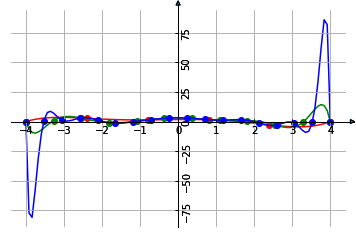

In [17]:
print("Общий график")
axes()

pylab.plot(x1, y1, 'ro', xnew1, ynew1, "-r")
pylab.plot(x2, y2, 'go', xnew2, ynew2, "-g")
pylab.plot(x3, y3, 'bo', xnew3, ynew3, "-b")
pylab.grid(True)
pylab.show()

print()

##### №7 Интерполяционные многочлены функции 𝑓(𝑥) на отрезке [−4,4] по 6,12,18 узлам Чебышева

In [18]:
def generate_nodes_ch(step_cnt):
    a = -4
    b = 4
    res_x = []
    for i in range (step_cnt):
        res_x.append((a + b) / 2 + ((b - a) / 2 * np.cos(np.pi * (2 * i + 1) / (2 * (step_cnt - 1) + 2))))
    res_x = np.asarray(res_x, dtype=float)
    res_y = [func_glob(x) for x in res_x]
    return res_x, res_y

6 узлов Чебышева:
[ 3.86370331  2.82842712  1.03527618 -1.03527618 -2.82842712 -3.86370331]
Значения:
[-0.06063289708610878, -2.2804482631550753, 1.1512379423204686, 0.454138685253467, 2.2792125703323642, 0.060630974352355725]


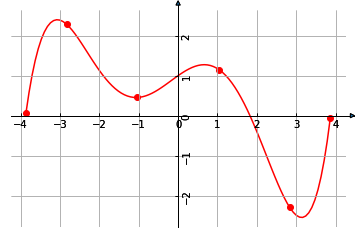

time:  0.00669488959152531

12 узлов Чебышева:
[ 3.96577945  3.69551813  3.17341336  2.43504572  1.53073373  0.52210477
 -0.52210477 -1.53073373 -2.43504572 -3.17341336 -3.69551813 -3.96577945]
Значения:
[-0.03595427059875964, -0.13704885942182532, -1.0239097821603012, -2.8619489032378147, 1.6835582522731338, 2.324726627433898, 2.3209807640366167, -1.4688242754801517, 2.855983475792626, 1.0237129968109981, 0.13704225055047306, 0.03595339042398676]


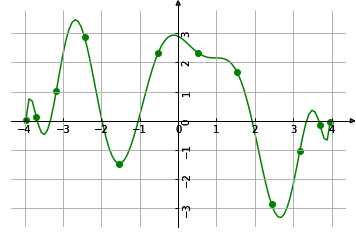

time:  0.02987836604066274

18 узлов Чебышева:
[ 3.98477879  3.86370331  3.62523115  3.27660818  2.82842712  2.29430575
  1.69047305  1.03527618  0.34862297 -0.34862297 -1.03527618 -1.69047305
 -2.29430575 -2.82842712 -3.27660818 -3.62523115 -3.86370331 -3.98477879]
Значения:
[-0.03257381485255191, -0.06063289708610878, -0.18863772185771863, -0.7383675951802297, -2.2804482631550753, -2.3841239784094985, 1.4554529900645703, 1.151237942320468, 2.763674179470477, 2.7638856811816574, 0.4541386852534632, -1.376491191300346, 2.3756386995545267, 2.2792125703323642, 0.7382612678383303, 0.1886268670829548, 0.06063097435235558, 0.03257305581993862]
time:  0.05292251508247503


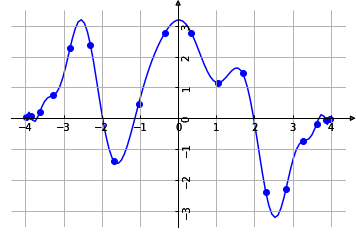

In [19]:
x1_ch, y1_ch = generate_nodes_ch(6)
print('6 узлов Чебышева:')
print(x1_ch)
print('Значения:')
print(y1_ch)

axes()

xnew1_ch = np.linspace(np.min(x1_ch), np.max(x1_ch), 100)
start_time = time.clock()
ynew1_ch = [lagranz(x1_ch, y1_ch, i) for i in xnew1_ch]
end_time = time.clock() - start_time
plt.plot(x1_ch, y1_ch, 'ro', xnew1_ch, ynew1_ch, "-r")
plt.grid(True)
plt.show()
print('time: ', end_time)
print()

x2_ch, y2_ch = generate_nodes_ch(12)
print('12 узлов Чебышева:')
print(x2_ch)
print('Значения:')
print(y2_ch)

axes()

xnew2_ch = np.linspace(np.min(x2_ch), np.max(x2_ch), 100)
start_time = time.clock()
ynew2_ch = [lagranz(x2_ch, y2_ch, i) for i in xnew2_ch]
end_time = time.clock() - start_time
pylab.plot(x2_ch, y2_ch, 'go', xnew2_ch, ynew2_ch, "-g")
pylab.grid(True)
plt.show()
print('time: ', end_time)
print()

x3_ch, y3_ch = generate_nodes_ch(18)
print('18 узлов Чебышева:')
print(x3_ch)
print('Значения:')
print(y3_ch)

axes()

xnew3_ch = np.linspace(np.min(x3_ch), np.max(x3_ch), 100)
start_time = time.clock()
ynew3_ch = [lagranz(x3_ch, y3_ch, i) for i in xnew3_ch]
end_time = time.clock() - start_time
pylab.plot(x3_ch, y3_ch, 'bo', xnew3_ch, ynew3_ch, "-b")
print('time: ', end_time)
pylab.grid(True)
pylab.show()

Общий график


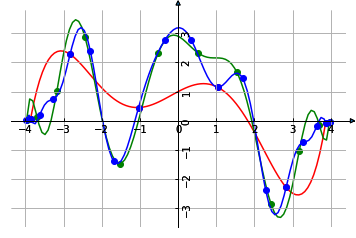

In [20]:
print("Общий график")
axes()

pylab.plot(x1_ch, y1_ch, 'ro', xnew1_ch, ynew1_ch, "-r")
pylab.plot(x2_ch, y2_ch, 'go', xnew2_ch, ynew2_ch, "-g")
pylab.plot(x3_ch, y3_ch, 'bo', xnew3_ch, ynew3_ch, "-b")
pylab.grid(True)
pylab.show()

print()

##### №8  Интерполяционные сплайны третьего порядка функции 𝑓(𝑥) на отрезке [−4,4] по 6,12,18 равноотстоящим узлам

In [26]:
def cubic_interpolation(x0, x, y):
    x = np.asfarray(x1)
    y = np.asfarray(y1)

    size = len(x)

    xdiff = np.diff(x)
    ydiff = np.diff(y)

    Li = np.empty(size)
    Li_1 = np.empty(size - 1)
    z = np.empty(size)

    # [L][y] = [B]
    Li[0] = sqrt(2 * xdiff[0])
    Li_1[0] = 0.0
    B0 = 0.0 
    z[0] = B0 / Li[0]

    for i in range(1, size - 1, 1):
        Li_1[i] = xdiff[i - 1] / Li[i - 1]
        Li[i] = sqrt(2 * (xdiff[i - 1] + xdiff[i]) - Li_1[i - 1] * Li_1[i - 1])
        Bi = 6 * (ydiff[i] / xdiff[i] - ydiff[i - 1] / xdiff[i - 1])
        z[i] = (Bi - Li_1[i - 1] * z[i - 1]) / Li[i]

    i = size - 1
    Li_1[i - 1] = xdiff[-1] / Li[i - 1]
    Li[i] = sqrt(2 * xdiff[-1] - Li_1[i - 1] * Li_1[i - 1])
    Bi = 0.0 
    z[i] = (Bi - Li_1[i - 1] * z[i - 1]) / Li[i]

    # [L.T][x] = [y]
    i = size - 1
    z[i] = z[i] / Li[i]
    for i in range(size - 2, -1, -1):
        z[i] = (z[i] - Li_1[i - 1] * z[i + 1]) / Li[i]     
        
    # find index
    index = x.searchsorted(x0)
    np.clip(index, 1, size - 1, index)

    xi1, xi0 = x[index], x[index - 1]
    yi1, yi0 = y[index], y[index - 1]
    zi1, zi0 = z[index], z[index - 1]
    hi1 = xi1 - xi0

    # calculate cubic
    f0 = zi0 / (6 * hi1) * (xi1 - x0) ** 3 + \
         zi1 / (6 * hi1) * (x0 - xi0) ** 3 + \
         (yi1 / hi1 - zi1 * hi1 / 6) * (x0 - xi0) + \
         (yi0 / hi1 - zi0 * hi1 / 6) * (xi1 - x0)
    return f0

0.0035609668793767923


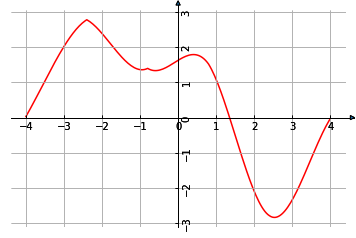

In [105]:
axes()
x_spline = np.linspace(-4, 4, 201)

x1, y1 = generate_nodes(6)

start_time = time.clock()
plt.plot(x_spline, cubic_interpolation(x_spline, x1, y1), "-r")
print(time.clock() - start_time)
plt.grid(True)
plt.show()

0.0031071144576344523


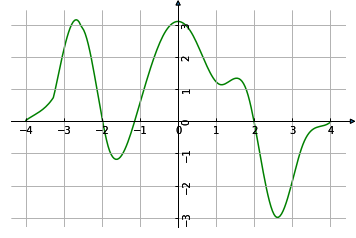

In [103]:
axes()
x2, y2 = generate_nodes(12)

start_time = time.clock()
plt.plot(x_spline, cubic_interpolation(x_spline, x2, y2), "-g")
print(time.clock() - start_time)
plt.grid(True)
plt.show()

0.00309729735045039


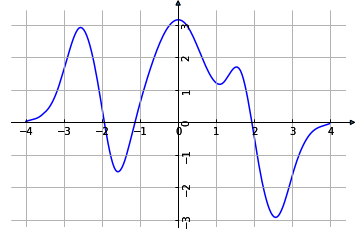

In [101]:
axes()
x3, y3 = generate_nodes(18)

start_time = time.clock()
plt.plot(x_spline, cubic_interpolation(x_spline, x3, y3), "-b")
print(time.clock() - start_time)
plt.grid(True)
plt.show()